In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV


In [14]:
from google.colab import files
uploads=files.upload()

Saving train_data.csv to train_data (1).csv


In [0]:
#categorising the different columns into their different data types
nominal=['Street','Alley','LandContour','LotConfig','Neighborhood','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','CentralAir','GarageType','PavedDrive','MiscFeature','SaleType']
ordinal=['MSZoning','LotShape','Utilities','LandSlope','Condition1','Condition2','BldgType','HouseStyle','MasVnrType','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','SaleCondition']
numerical=['GrLivArea']
target=['SalePrice']

In [0]:
data .isnull() #check for null values in the data 
data.replace({"NA":np. nan}, inplace= True) #setting Na_values in place of null values
data

In [0]:
new_data= data.fillna(axis=0, method='ffill').fillna(axis=0,method='bfill') #from the links provided, this is how we replace missing values with the values before or after them
new_data
#after running this cell,you will notice that there exists no missing data

In [0]:
#combining the categorical data from my dataset
categorical_data=new_data.select_dtypes(include=['object']).copy()
column_names=list(categorical_data.columns)

for feature in column_names:
  categorical_data[feature]=categorical_data[feature].astype('category')
#integer encoding for ordinal data
for feature in ordinal:
  categorical_data[feature]=categorical_data[feature].cat.codes

categorical_data.head()

In [0]:
#performing one hot encoding to replace the values with meaningful numerical values
data_copy=categorical_data.copy()

data_copy = pd.concat([pd.get_dummies(data_copy[nominal]),data_copy],axis=1) 
#dropping the norminals that aren't needed
data_copy.drop(nominal,axis=1,inplace=True)
latest_data = pd.concat([data_copy,new_data[numerical],new_data[target]],axis=1)
latest_data


In [0]:
X=latest_data.drop("SalePrice",1)
data_array=X.to_numpy()
#data_array

In [0]:
#filtering data of x to fit in the gaussian distribution
X = StandardScaler().fit_transform(X)
X

In [0]:
#performing pca
pca = PCA(n_components=2)
pc_s = pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s, columns=['PC1','PC2'])
final_data= pd.concat([pca_data,data[target]],axis=1)
final_data

In [0]:
final_data_array=final_data.to_numpy()

In [37]:
pca.explained_variance_ratio_

array([0.05544576, 0.03556903])

In [0]:
min_val=np.min(final_data_array,axis=0)
max_val=np.max(final_data_array,axis=0)
X,Y=np.meshgrid(np.linspace(min_val[0],max_val[0],20),np.linspace(min_val[1],max_val[1],20))

In [0]:
#regression using Lasso
regressor=LassoCV()

training_final=np.c_[final_data_array[:,0],final_data_array[:,1]]
#regressor.fit(X,y)
regressor.fit(training_final,final_data_array[:,2])
weight_1=regressor.coef_[0]
weight_2=regressor.coef_[1]
b=regressor.intercept_
#the general linear regression equation
Z=weight_1*X + weight_2*Y + b

Text(0.5, 0.92, 'Plane/Line of best fit')

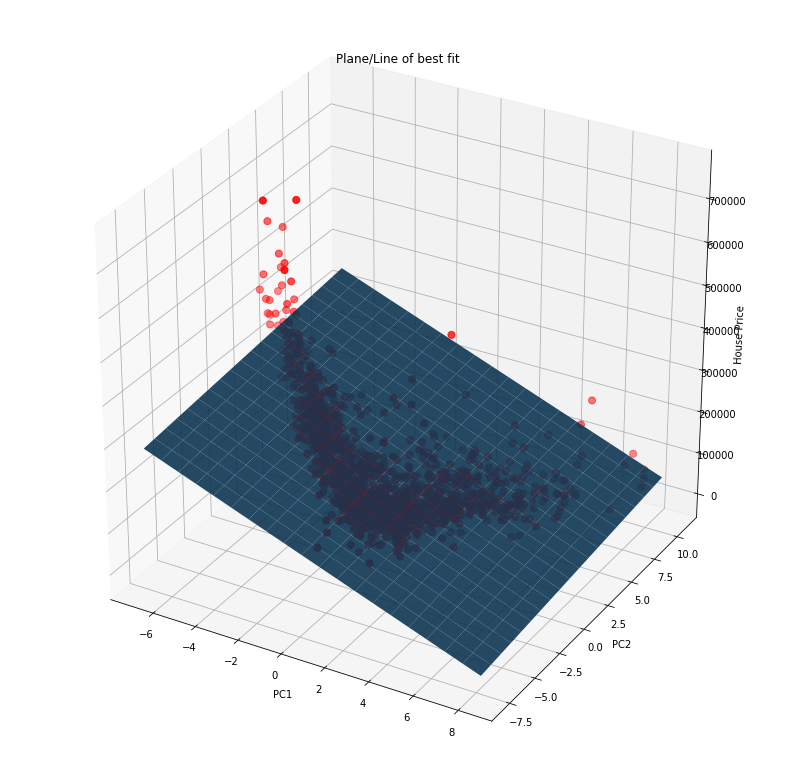

In [44]:
#plotting the data on a 3D axis
figure1=plt.figure(figsize=(14,14))
ax=figure1.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0],final_data_array[:,1],final_data_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price')
ax.set_title('Plane/Line of best fit')